In [4]:
from pycaret.datasets import get_data
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv('C:/Users/Rafae/Documents/Geral/Ufal/P8/ML/03_Validation/abalone_dataset.csv')
# assuming 'df' is your DataFrame
dummies = pd.get_dummies(data['sex'])

# rename the columns
dummies.columns = ['male', 'female', 'other']

# concatenate the new columns with the original DataFrame
data = pd.concat([data, dummies], axis=1)

# drop the original 'sex' column
data = data.drop('sex', axis=1)
data = data.drop('male', axis=1)
data = data.drop('female', axis=1)

mask = data['type'] != 1
data = data[mask]

# data['type'] = data['type'].replace(3, 2)

# feature_cols = ['sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','type']
# feature_cols = ['sex','shucked_weight','shell_weight','type']
# data = data[feature_cols]
y = data.type
X = data.drop(['type'], axis=1)

<Axes: >

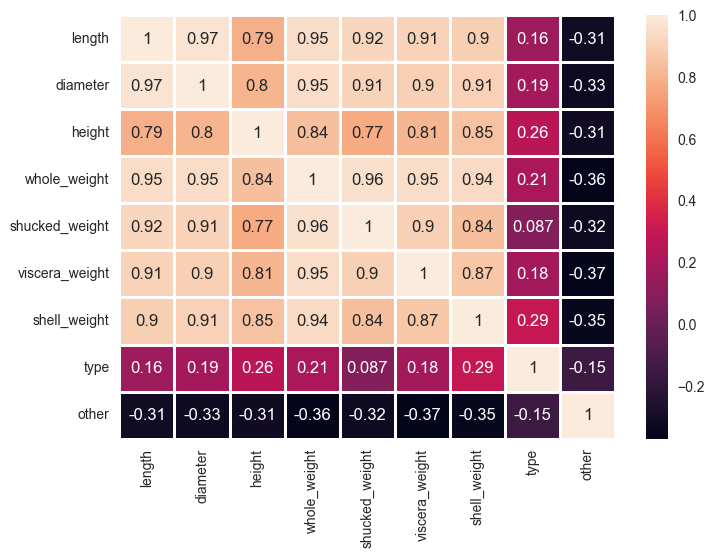

In [6]:
data_corr = data.corr(method='spearman')

correlation = data.corr()
sns.heatmap(data_corr, annot = True, linewidths = 1)

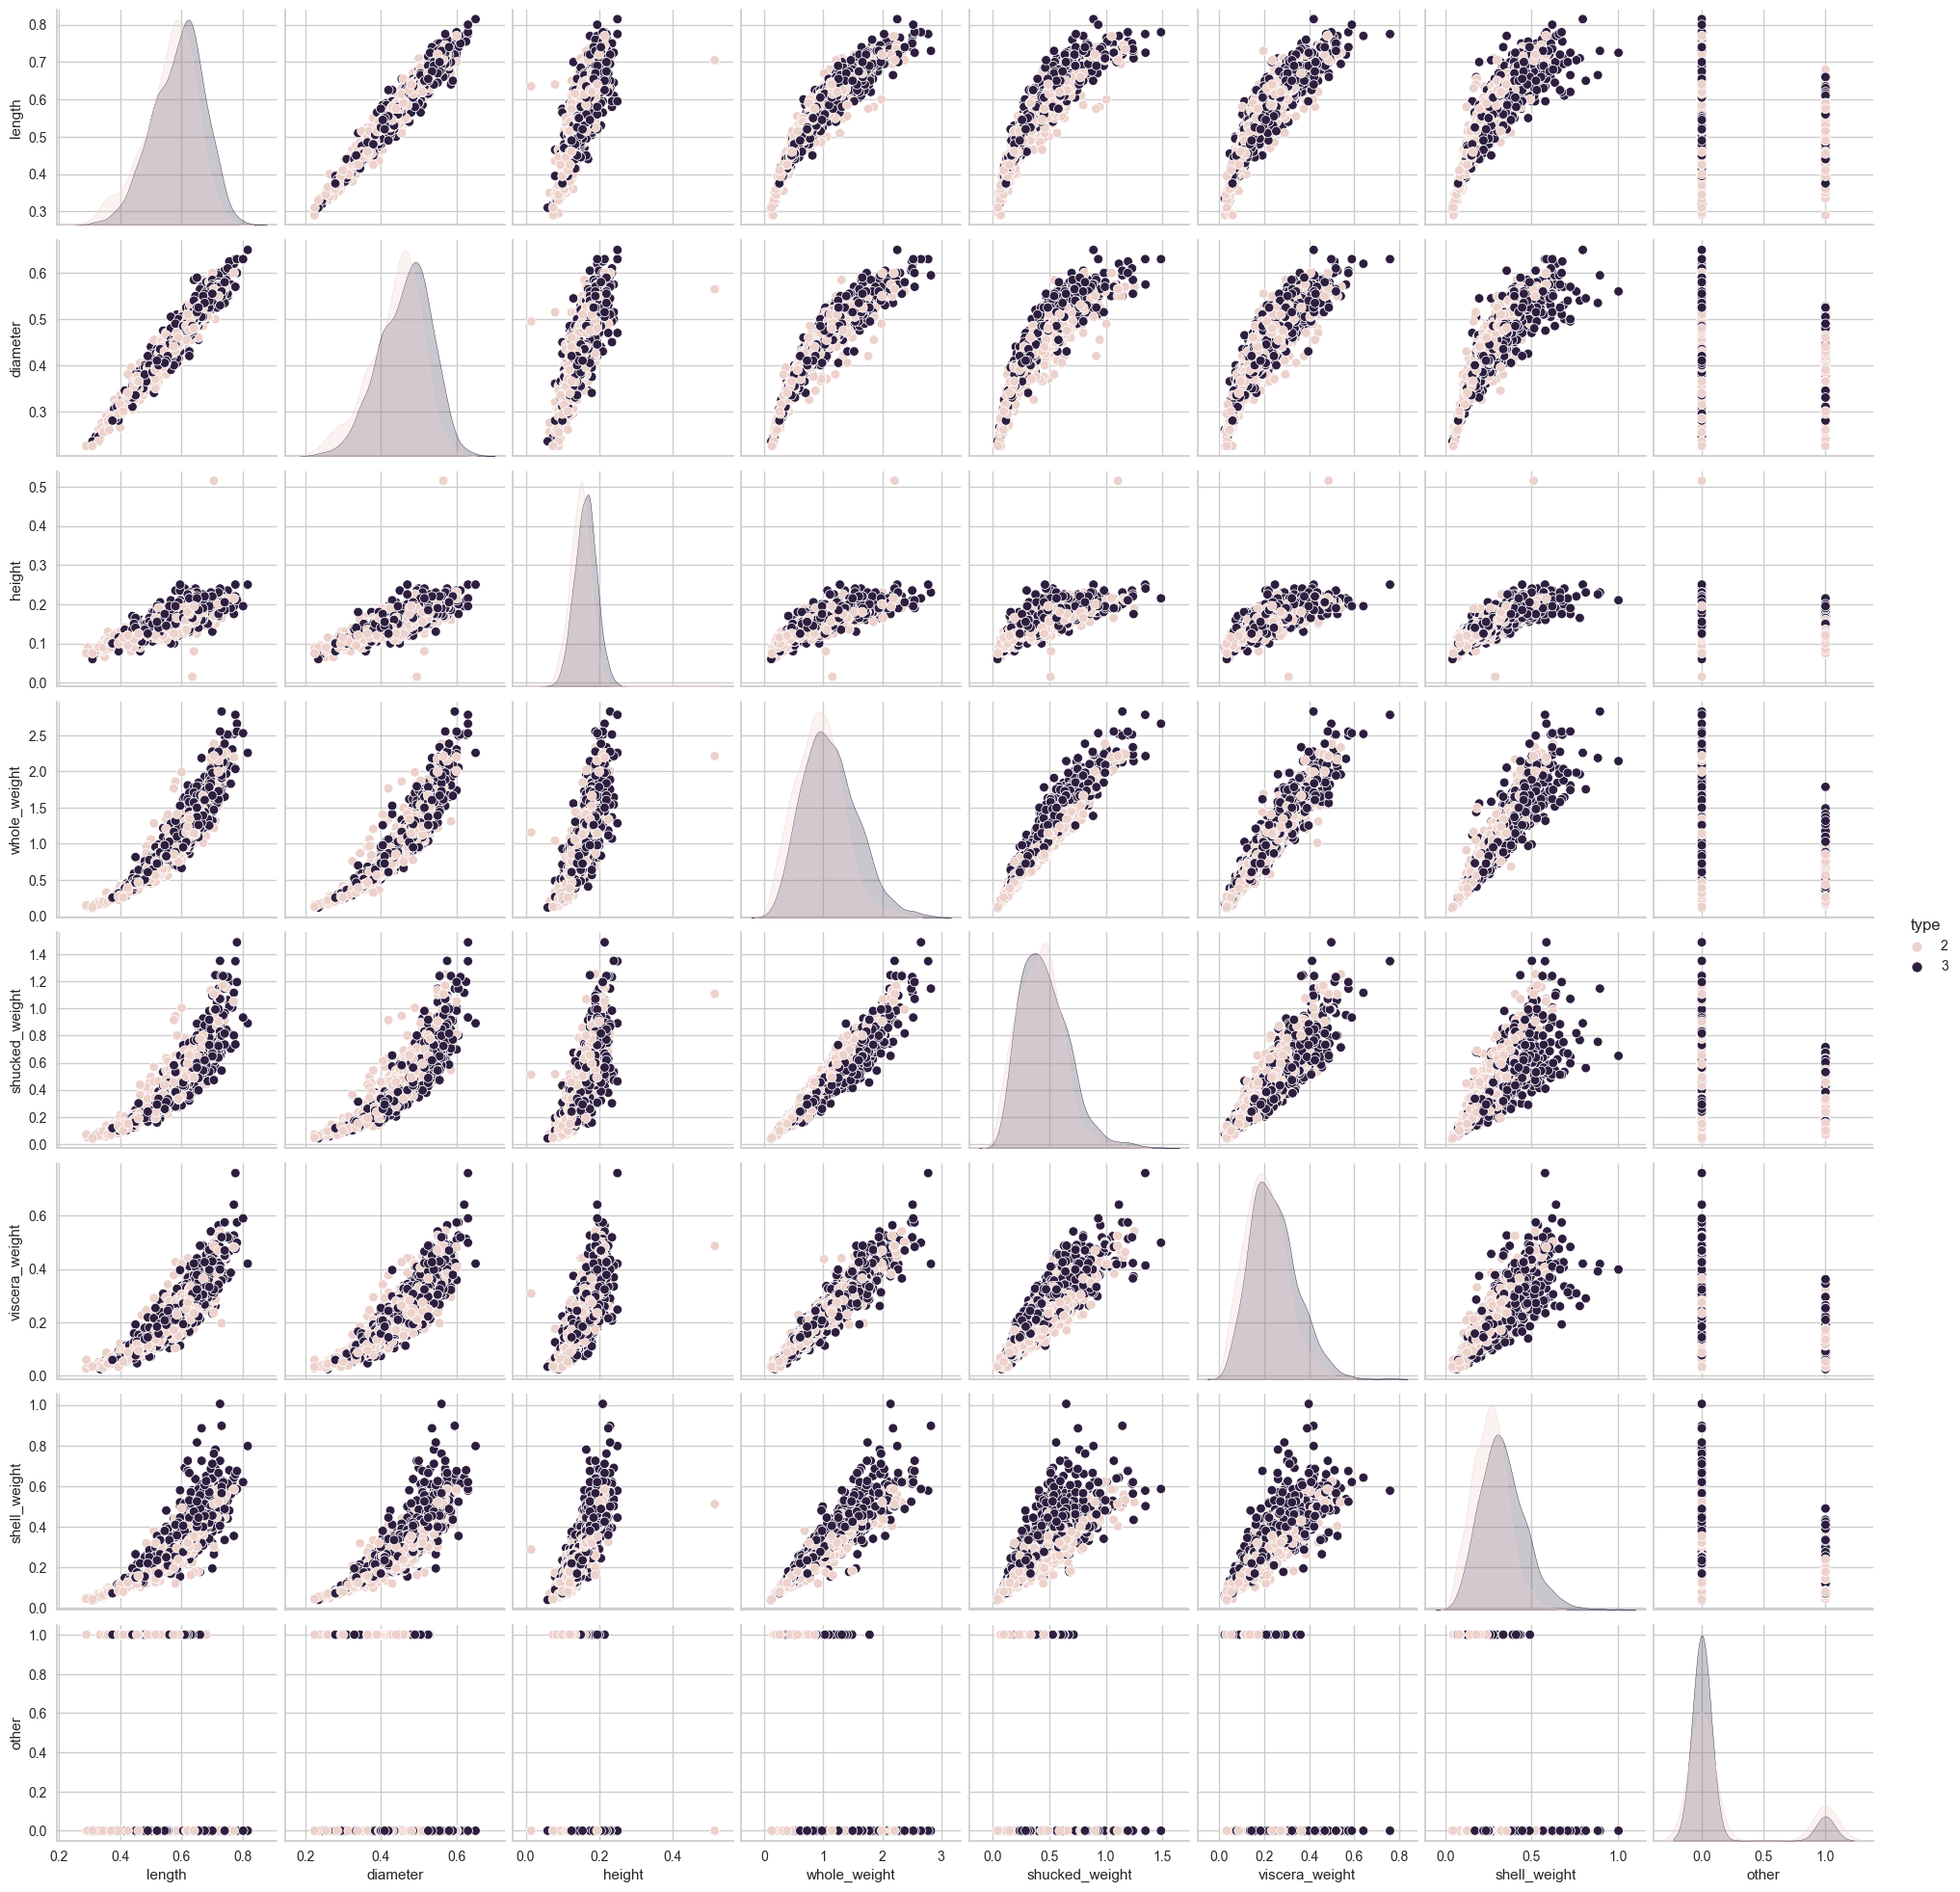

In [7]:
sns.pairplot(data, hue='type')

In [8]:
functional_api = setup(data, target = 'type', session_id = 123, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,123
1,Target,type
2,Target type,Binary
3,Target mapping,"2: 0, 3: 1"
4,Original data shape,"(2054, 9)"
5,Transformed data shape,"(2054, 9)"
6,Transformed train set shape,"(1437, 9)"
7,Transformed test set shape,"(617, 9)"
8,Numeric features,8
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

In [9]:
oop_api  = ClassificationExperiment()
oop_api = oop_api.setup(data, target = 'type', session_id = 123, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,123
1,Target,type
2,Target type,Binary
3,Target mapping,"2: 0, 3: 1"
4,Original data shape,"(2054, 9)"
5,Transformed data shape,"(2054, 9)"
6,Transformed train set shape,"(1437, 9)"
7,Transformed test set shape,"(617, 9)"
8,Numeric features,8
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

In [10]:
# functional API
best_functional_api = functional_api.compare_models()


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [11]:
best_functional_api

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [12]:

# OOP API
best_oop_api = oop_api.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:35:59
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7027,0.7716,0.6393,0.7459,0.6876,0.4070,0.4124,0.4020
catboost,CatBoost Classifier,0.6979,0.7731,0.6978,0.7107,0.7031,0.3956,0.3968,0.4000
et,Extra Trees Classifier,0.6951,0.7535,0.6814,0.7126,0.6954,0.3903,0.3921,0.6110
ridge,Ridge Classifier,0.6937,0.0000,0.6366,0.7328,0.6806,0.3888,0.3932,0.3780
gbc,Gradient Boosting Classifier,0.6924,0.7636,0.6748,0.7135,0.6922,0.3851,0.3873,0.4680
rf,Random Forest Classifier,0.6923,0.7562,0.6761,0.7115,0.6926,0.3849,0.3864,0.5940
ada,Ada Boost Classifier,0.6819,0.7388,0.6747,0.6955,0.6844,0.3639,0.3646,0.5180
qda,Quadratic Discriminant Analysis,0.6799,0.7420,0.5293,0.7763,0.6277,0.3642,0.3860,0.3930
xgboost,Extreme Gradient Boosting,0.6798,0.7395,0.6801,0.6912,0.6844,0.3594,0.3608,0.4800
lr,Logistic Regression,0.6784,0.7500,0.6598,0.6971,0.6771,0.3573,0.3586,0.4260


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [13]:
# functional API
functional_api.evaluate_model(best_functional_api)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:

# OOP API
oop_api.evaluate_model(best_oop_api)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
oop_api.predict_model(best_oop_api)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.6515,0.7350,0.5570,0.7012,0.6208,0.3062,0.3132


,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,other,type,prediction_label,prediction_score
1164,0.620,0.525,0.155,1.0850,0.4540,0.1965,0.3500,0,0,3,0.6004
1346,0.500,0.385,0.135,0.5510,0.2245,0.0715,0.2060,0,1,2,0.5818
537,0.580,0.425,0.145,0.8300,0.3790,0.1605,0.2575,1,1,2,0.7347
1382,0.590,0.470,0.155,1.1735,0.6245,0.2330,0.2595,0,0,2,0.7798
1398,0.640,0.525,0.200,1.3765,0.4400,0.3075,0.4700,0,1,3,0.9462
...,...,...,...,...,...,...,...,...,...,...,...
562,0.615,0.480,0.190,1.3600,0.5305,0.2375,0.4700,0,1,3,0.8546
1679,0.505,0.385,0.125,0.5960,0.2450,0.0970,0.2100,1,0,2,0.6845
1788,0.330,0.245,0.085,0.1710,0.0655,0.0365,0.0550,0,1,2,0.7305
863,0.615,0.470,0.145,1.0285,0.4435,0.2825,0.2850,0,1,2,0.5995


In [16]:
predictions = oop_api.predict_model(best_oop_api, data=data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.6850,0.7641,0.6099,0.7301,0.6646,0.3721,0.3775


,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,other,type,prediction_label,prediction_score
0,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.240,0,1,3,0.5476
3,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.220,0,1,3,0.5862
5,0.700,0.575,0.205,1.7730,0.6050,0.4470,0.538,0,1,3,0.9623
6,0.400,0.305,0.085,0.2970,0.1080,0.0705,0.100,0,0,2,0.7142
7,0.620,0.480,0.165,1.0125,0.5325,0.4365,0.324,0,0,2,0.8386


In [17]:
# OOP API
oop_api.save_model(best_oop_api, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Rafae\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['length', 'diameter', 'height',
                                              'whole_weight', 'shucked_weight',
                                              'viscera_weight', 'shell_weight',
                                              'other'...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                            